In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [16]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [17]:
CPI = pd.read_csv('CPI_monthly.csv', parse_dates = True, index_col = 'DATE')
# CPI_start_index = CPI[CPI['DATE'] == '2001-01-01'].index.values[0]
# CPI_end_index = CPI[CPI['DATE'] == '2019-12-01'].index.values[0]
# CPI_df = CPI[CPI_start_index:CPI_end_index + 1]
CPI_start_index = '2001-01-01'
CPI_end_index = '2020-01-01'
CPI = CPI[CPI_start_index:CPI_end_index]
CPI

,CPALTT01USM661S
DATE,
2001-01-01,74.087513
2001-02-01,74.256277
2001-03-01,74.298468
2001-04-01,74.425041
2001-05-01,74.804761
...,...
2019-09-01,108.259323
2019-10-01,108.527658
2019-11-01,108.778695


In [18]:
upsampled_CPI = CPI.resample('W').ffill()
upsampled_CPI.drop(upsampled_CPI.tail(1).index,inplace=True)
upsampled_CPI

,CPALTT01USM661S
DATE,
2001-01-07,74.087513
2001-01-14,74.087513
2001-01-21,74.087513
2001-01-28,74.087513
2001-02-04,74.256277
...,...
2019-12-01,109.040280
2019-12-08,109.040280
2019-12-15,109.040280


In [19]:
sigma = upsampled_CPI.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 991)
variations

array([ 4.55847194e+00, -5.92897624e+00,  2.06191292e+00,  2.02871137e+00,
       -7.56312552e+00,  4.11514805e+00, -2.11706122e+00, -6.36093221e+00,
        9.40344354e+00, -6.40165371e+00,  3.01874627e+00, -2.42835506e+00,
        4.37415180e-01, -6.58455557e+00,  7.80397598e+00,  2.39988979e+00,
        2.47363358e+00, -2.25945806e+00, -4.92885854e+00,  8.11938580e+00,
        5.48762323e+00, -7.84961684e-02, -4.51167916e+00, -3.83929109e+00,
        4.69282801e+00, -1.11982219e+00, -2.12286440e-01, -4.59577266e+00,
       -3.00632414e+00,  6.36503813e-01,  3.79725934e+00,  2.34167163e+00,
        1.52448512e+00, -2.75599225e+00,  2.36256256e-01, -2.80763442e+00,
       -7.20695017e+00,  2.62634130e+00,  5.05351248e+00, -4.63957347e-02,
       -6.73973226e+00, -1.48322481e+00, -8.05952126e+00,  2.92784100e+00,
        6.92778047e+00,  3.31305816e+00,  1.24839844e-02, -4.58909635e+00,
       -1.23680861e+01, -3.10644926e+00, -6.37542648e+00, -4.65039907e+00,
        2.53564831e+00,  

In [20]:
upsampled_CPI_series = pd.DataFrame.to_numpy(upsampled_CPI).flatten()
upsampled_CPI_series = upsampled_CPI_series + variations

In [21]:
upsampled_CPI_series

array([ 78.64598465,  68.15853647,  76.14942563,  76.11622408,
        66.69315146,  78.37142503,  72.13921576,  67.89534477,
        83.70191158,  67.89681433,  77.31721431,  71.87011298,
        74.86245642,  67.84048567,  82.22901722,  76.82493104,
        76.89867482,  72.54530278,  69.8759023 ,  82.92414664,
        80.29238407,  74.89502894,  70.46184594,  71.13423402,
        79.66635312,  73.72712971,  74.63466547,  70.25117924,
        71.84062777,  75.48345572,  78.64421125,  77.18862354,
        76.37143702,  72.09095966,  75.37854563,  72.33465495,
        67.9353392 ,  77.76863067,  80.19580186,  74.8849383 ,
        68.19160178,  73.44810923,  66.87181278,  77.81698398,
        81.81692344,  78.20220113,  74.90162696,  70.25785556,
        62.47886579,  71.74050265,  68.47152543,  70.19655284,
        77.50917342,  77.63242028,  82.46904298,  74.67877801,
        65.54378953,  80.10119397,  70.75663201,  68.39558708,
        71.51233003,  80.02771971,  69.55132746,  78.11

In [22]:
upsampled_CPI['CPALTT01USM661S']  = upsampled_CPI_series
upsampled_CPI

,CPALTT01USM661S
DATE,
2001-01-07,78.645985
2001-01-14,68.158536
2001-01-21,76.149426
2001-01-28,76.116224
2001-02-04,66.693151
...,...
2019-12-01,112.084710
2019-12-08,109.471205
2019-12-15,108.183411


In [23]:
upsampled_CPI_01_08 = upsampled_CPI[:417]
upsampled_CPI_01_08

,CPALTT01USM661S
DATE,
2001-01-07,78.645985
2001-01-14,68.158536
2001-01-21,76.149426
2001-01-28,76.116224
2001-02-04,66.693151
...,...
2008-11-30,99.238162
2008-12-07,82.367875
2008-12-14,96.265108


In [24]:
upsampled_CPI_09_19 = upsampled_CPI[417:]
upsampled_CPI_09_19

,CPALTT01USM661S
DATE,
2009-01-04,93.262178
2009-01-11,91.817169
2009-01-18,91.122475
2009-01-25,87.888142
2009-02-01,82.715265
...,...
2019-12-01,112.084710
2019-12-08,109.471205
2019-12-15,108.183411


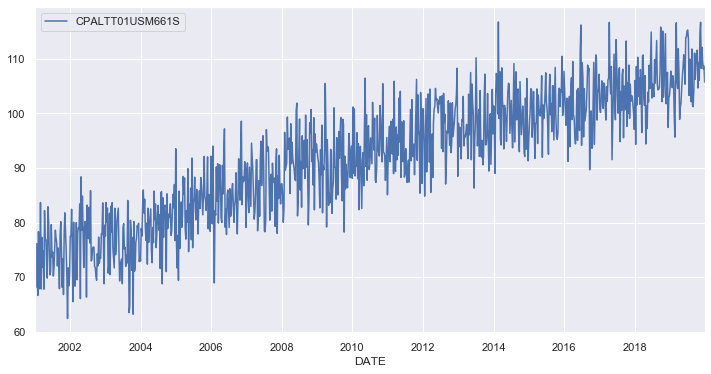

In [25]:
upsampled_CPI.plot.line()

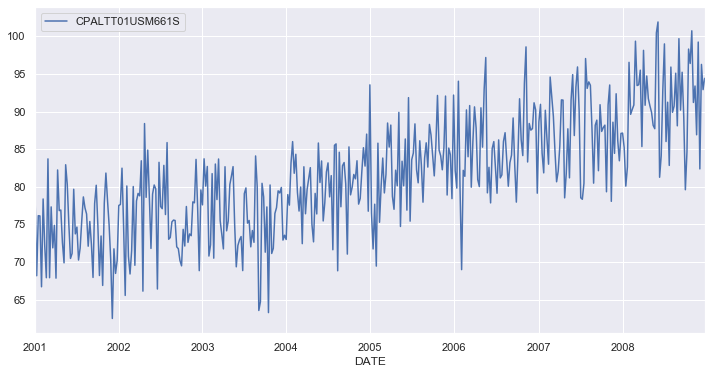

In [26]:
upsampled_CPI_01_08.plot.line()

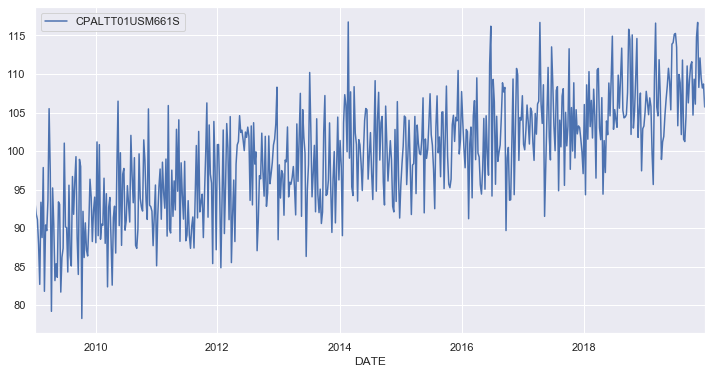

In [27]:
upsampled_CPI_09_19.plot.line()

In [28]:
upsampled_CPI_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/CPI_01_08.csv')

In [30]:
upsampled_CPI_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/CPI_09_19.csv')